In [64]:
import pandas as pd
from pathlib import Path
%matplotlib inline

In [65]:
# Reading in the CSV file called "bitstamp.csv" using the Path module. 
# This CSV file is located in the Resources folder.
# Setting the index to the column "Timestamp"
bitstamp = pd.read_csv(
    Path("./Resources/bitstamp.csv"),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)

In [66]:
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129540 non-null  object 
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(6), object(1)
memory usage: 7.9+ MB


In [67]:
# Reading in the CSV file called "coinbase.csv" using the Path module...
coinbase = pd.read_csv(
    Path("./Resources/coinbase.csv"),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)

In [68]:
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


In [69]:
# Dropping records with null values
bitstamp.isnull().sum()
bitstamp = bitstamp.dropna()
bitstamp.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [70]:
# Using the str.replace function to remove the dollar sign in the close series
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

C:\Users\racha\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [71]:
# Converting the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  float64
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


In [72]:
# Reviewing the data for duplicate values (to drop them if necessary). None found in bitstamp.csv.
bitstamp.duplicated().sum()

0

In [73]:
# Reviewing and scrubbing the coinbase dataset
# First checking for null values. There are 218 records missing High, Low, Volume and Weight Price.
# Dropping records with null values.
coinbase.isnull().sum()
coinbase = coinbase.dropna()
coinbase.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [74]:
# Using the str.replace function to remove the dollar sign in the close series
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")

C:\Users\racha\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [75]:
# Converting the Close data type to a float
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129322 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129322 non-null  float64
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


In [76]:
# Reviewing the data for duplicate values (to drop them if necessary). 
coinbase.duplicated().sum()

0

In [77]:
# Slicing the data to focus on the relevant field: Close.
bitstamp_sliced = bitstamp.loc[:,"Close"]

bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [78]:
# Slicing the coinbase data...
coinbase_sliced = coinbase.loc[:,"Close"]

coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

In [79]:
# Generating the summary statistics for the bitstamp dataframe.
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [80]:
# Generating the summary statistics for the coinbase dataframe.
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitcoin on Bitstamp'}, xlabel='Timestamp'>

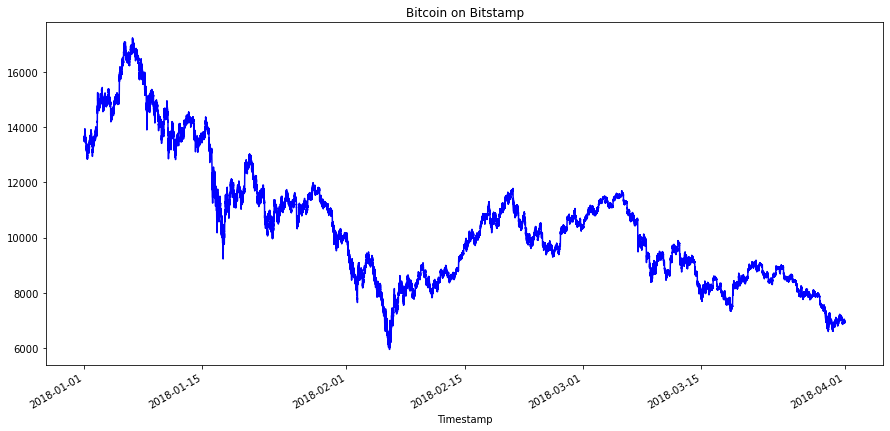

In [81]:
# Creating a line plot for the bitstamp dataframe for the full time series.
bitstamp_sliced.plot(figsize=(15, 7), title="Bitcoin on Bitstamp", color="blue")

<AxesSubplot:title={'center':'Bitcoin on Coinbase'}, xlabel='Timestamp'>

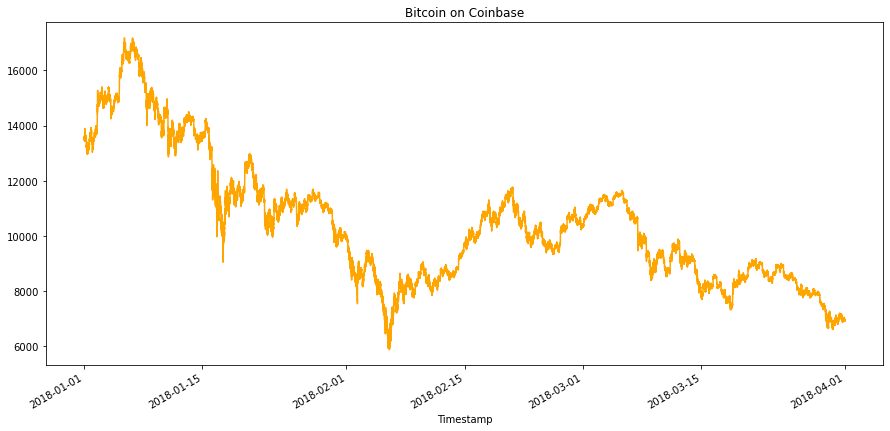

In [82]:
# Creating a line plot for the coinbase DataFrame for the full time series.
coinbase_sliced.plot(figsize=(15, 7), title="Bitcoin on Coinbase", color="Orange")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

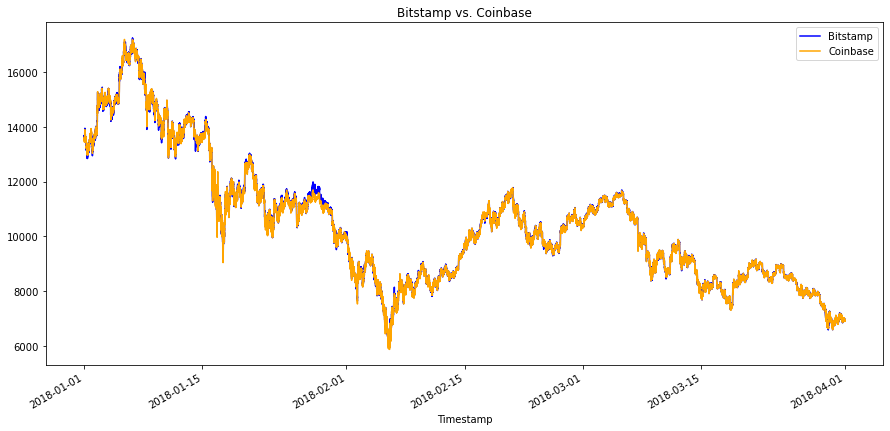

In [83]:
# Creating an overlay plot for the bitstamp and coinbase series
bitstamp_sliced.plot(legend=True, figsize=(15, 7), title="Bitstamp vs. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15, 7), color="Orange", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

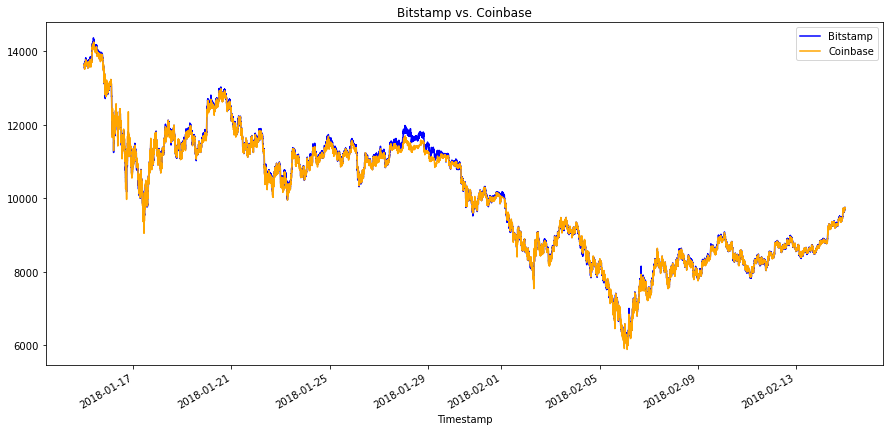

In [84]:
# Creating an overlay plot to visualize price action of both series in the four weeks from mid-January to mid-February.

bitstamp_sliced.loc['2018-01-15':'2018-02-14'].plot(legend=True, figsize=(15, 7), title="Bitstamp vs. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-01-15': '2018-02-14'].plot(legend=True, figsize=(15, 7), color="Orange", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

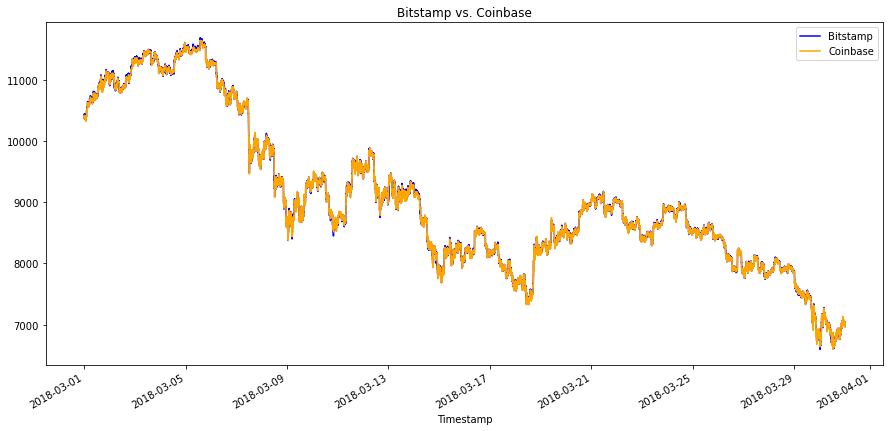

In [85]:
#Another plot visualizing the same series in the month of March.

bitstamp_sliced.loc['2018-03-01':'2018-03-30'].plot(legend=True, figsize=(15, 7), title="Bitstamp vs. Coinbase", color="blue", label="Bitstamp")
coinbase_sliced.loc['2018-03-01':'2018-03-30'].plot(legend=True, figsize=(15, 7), color="Orange", label="Coinbase")

**Notes** The degree of spread between pricing at Bitstamp and Coinbase appears to be largest in the last week of February. There are smaller differences throughout the months of January and February. In general, there is less blue showing through the graph in the final month of the dataset (March), indicating a tighter synchronization between pricing at the two exchanges. 

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase: 2018-01-28'}, xlabel='Timestamp'>

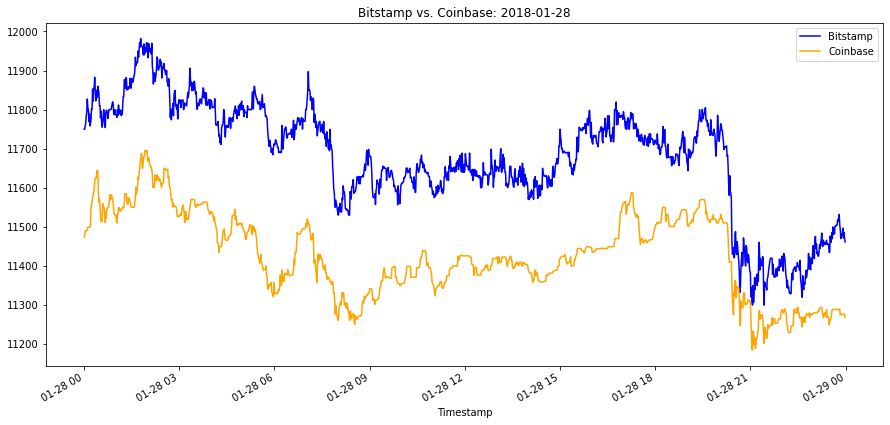

In [86]:
#Sample Dates
early_date = '2018-01-28'
middle_date = '2018-02-06'
late_date = '2018-03-30'

#Creating a plot to focus on the January 28, 2018--when the spreads were particularly wide.

bitstamp_sliced.loc[early_date].plot(legend=True, figsize=(15, 7), title="Bitstamp vs. Coinbase: "+early_date, color="blue", label="Bitstamp")
coinbase_sliced.loc[early_date].plot(legend=True, figsize=(15, 7), color="Orange", label="Coinbase")

In [87]:
# Calculating the arbitrage spreads on January 28,2018.
arbitrage_spread_early = bitstamp_sliced.loc[early_date] - coinbase_sliced.loc[early_date]

# Generating summary statistics.
arbitrage_spread_early.describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:>

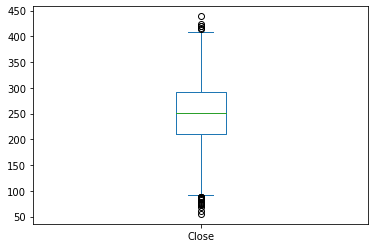

In [88]:
# Visualizing the arbitrage spread for January 28, 2018 with a box plot.
arbitrage_spread_early.plot(kind="box")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase: 2018-02-06'}, xlabel='Timestamp'>

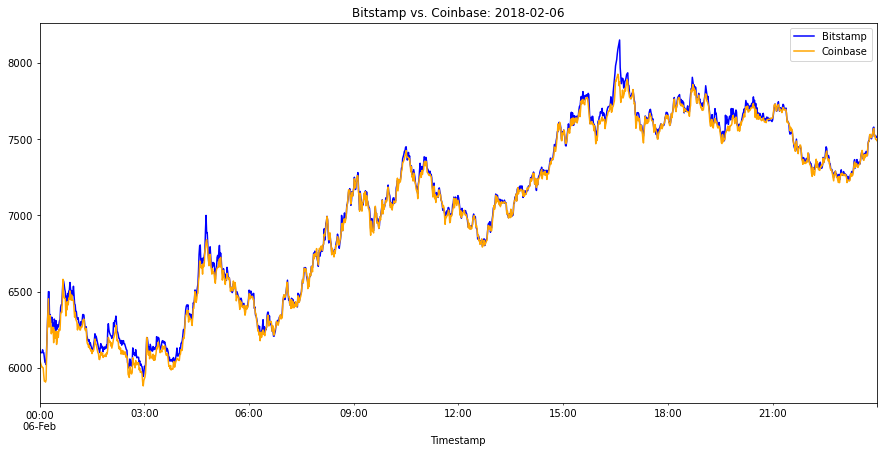

In [89]:
# Plotting prices for February 6, 2018.

bitstamp_sliced.loc[middle_date].plot(legend=True, figsize=(15, 7), title="Bitstamp vs. Coinbase: "+middle_date, color="blue", label="Bitstamp")
coinbase_sliced.loc[middle_date].plot(legend=True, figsize=(15, 7), color="Orange", label="Coinbase")

In [90]:
#Calculating the arbitrage spread in the middle time slice.
arbitrage_spread_middle = bitstamp_sliced.loc[middle_date] - coinbase_sliced.loc[middle_date]

# Generating summary statistics for the middle time slice. 
arbitrage_spread_middle.describe()

count    1440.000000
mean       23.841236
std        30.390321
min       -51.000000
25%         4.675000
50%        19.375000
75%        37.877500
max       280.010000
Name: Close, dtype: float64

<AxesSubplot:>

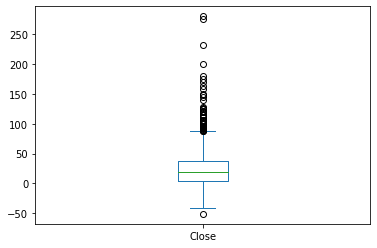

In [91]:
# Visualizing the arbitrage spread with a box plot.
arbitrage_spread_middle.plot(kind = "box")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase: 2018-03-30'}, xlabel='Timestamp'>

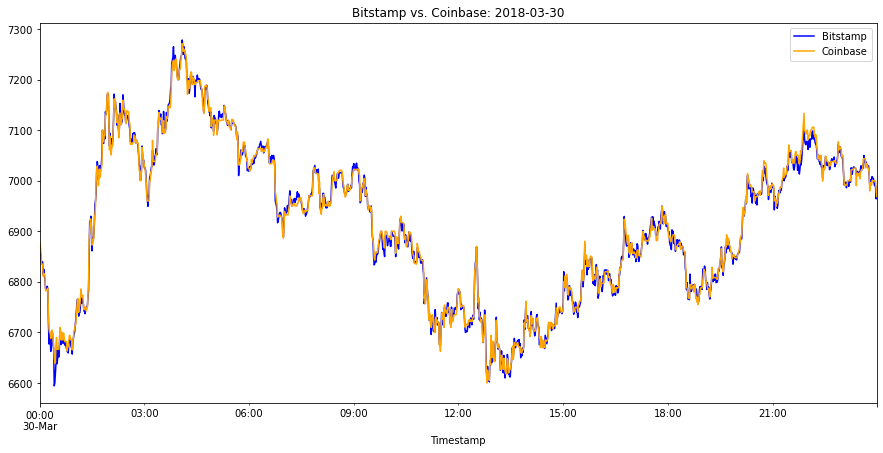

In [92]:
# Creating an overlay plot for March 30, 2018.
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc[late_date].plot(legend=True, figsize=(15, 7), title="Bitstamp vs. Coinbase: "+late_date, color="blue", label="Bitstamp")
coinbase_sliced.loc[late_date].plot(legend=True, figsize=(15, 7), color="Orange", label="Coinbase")

In [93]:
# Calculating the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp_sliced.loc[late_date] - coinbase_sliced.loc[late_date]

# Generating summary statistics.
arbitrage_spread_late.describe()

count    1440.000000
mean       -1.419507
std         8.918465
min       -56.920000
25%        -6.640000
50%        -1.205000
75%         4.412500
max        30.000000
Name: Close, dtype: float64

<AxesSubplot:>

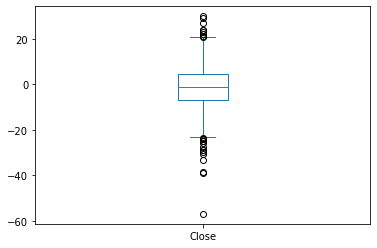

In [94]:
# Visualizing the arbitrage spread with a box plot.
arbitrage_spread_late.plot(kind="box")

In [95]:
# Using a conditional statement to generate the summary statistics for each arbitrage opportunity in the early time slice.
positive_filter_early = arbitrage_spread_early > 0
arbitrage_spread_early.loc[positive_filter_early].describe()

count    1436.000000
mean      247.552326
std        68.343472
min        55.030000
25%       210.022500
50%       251.180000
75%       290.925000
max       439.010000
Name: Close, dtype: float64

In [97]:
# Using a conditional statement to generate the summary statistics for each arbitrage opportunity in the middle time slice.
positive_filter_middle = arbitrage_spread_middle > 0
arbitrage_spread_middle.loc[positive_filter_middle].describe()

count    1177.000000
mean       31.294452
std        28.481383
min         0.010000
25%        13.000000
50%        24.530000
75%        42.540000
max       280.010000
Name: Close, dtype: float64

In [98]:
#Subtracting Bitstamp prices from Coinbase for the late date as the 50th percentile from the unfiltered dataframe is negative, indicating that Coinbase values were generally hihger.
arbitrage_spread_late = coinbase_sliced.loc[late_date] - bitstamp_sliced.loc[late_date]

In [99]:
# Using a conditional statement to generate the summary statistics for each arbitrage opportunity in the late time slice.
positive_filter_late = arbitrage_spread_late > 0
arbitrage_spread_late.loc[positive_filter_late].describe()

count    797.000000
mean       7.538846
std        6.265063
min        0.010000
25%        2.780000
50%        6.060000
75%       10.570000
max       56.920000
Name: Close, dtype: float64

In [100]:
# Calculating the returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early.loc[positive_filter_early] / coinbase_sliced.loc[early_date]

# Reviewing the spread return dataframe
spread_return_early.describe()

count    1436.000000
mean        0.021648
std         0.005961
min         0.004885
25%         0.018369
50%         0.021897
75%         0.025292
max         0.038510
Name: Close, dtype: float64

In [101]:
# Calculating the returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle.loc[positive_filter_middle] / coinbase_sliced.loc[middle_date]

# Reviewing the spread return dataframe
spread_return_middle.describe()

count    1177.000000
mean        0.004590
std         0.004220
min         0.000001
25%         0.001851
50%         0.003384
75%         0.006041
max         0.036984
Name: Close, dtype: float64

In [102]:
# Calculating the returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late.loc[positive_filter_late] / bitstamp_sliced.loc[late_date]

# Reviewing the spread return dataframe
spread_return_late.describe()

count    797.000000
mean       0.001095
std        0.000915
min        0.000001
25%        0.000403
50%        0.000877
75%        0.001545
max        0.008632
Name: Close, dtype: float64

In [103]:
# Determining the number of times trades with positive returns 
# exceeded the 1% minimum threshold required to cover transaction costs.
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Reviewing the first five profitable trades
profitable_trades_early.head(5)

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [104]:
# Determining the number of times trades with positive returns 
# exceeded the 1% minimum threshold required to cover transaction costs.
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Reviewing the first five profitable trades
profitable_trades_middle.head(5)

Timestamp
2018-02-06 00:00:00    0.010084
2018-02-06 00:02:00    0.012606
2018-02-06 00:03:00    0.014129
2018-02-06 00:04:00    0.016004
2018-02-06 00:05:00    0.019154
Name: Close, dtype: float64

In [105]:
# Determining the number of times trades with positive returns 
# exceeded the 1% minimum threshold required to cover transaction costs.
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Reviewing the first five profitable trades. For this last day in March there are none.
profitable_trades_late.head(5)

Series([], Name: Close, dtype: float64)

In [106]:
# Generating summary statistics for the profitable trade dataset.
profitable_trades_early.describe()

count    1378.000000
mean        0.022201
std         0.005421
min         0.010087
25%         0.019016
50%         0.022191
75%         0.025413
max         0.038510
Name: Close, dtype: float64

In [107]:
profitable_trades_middle.describe()

count    110.000000
mean       0.014312
std        0.005292
min        0.010084
25%        0.010822
50%        0.012209
75%        0.015809
max        0.036984
Name: Close, dtype: float64

In [108]:
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [109]:
# Calculating potential profit in dollars.
profit_early = profitable_trades_early * bitstamp_sliced.loc[early_date]

# Drop any missing values from the profit dataframe
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-28 00:00:00    281.988859
2018-01-28 00:01:00    281.590414
2018-01-28 00:02:00    275.056978
2018-01-28 00:03:00    281.613252
2018-01-28 00:04:00    301.796040
                          ...    
2018-01-28 23:55:00    224.395832
2018-01-28 23:56:00    198.485719
2018-01-28 23:57:00    212.603835
2018-01-28 23:58:00    198.496065
2018-01-28 23:59:00    195.922778
Name: Close, Length: 1378, dtype: float64

In [110]:
# Calculating potential profit in dollars.
profit_middle = profitable_trades_middle * bitstamp_sliced.loc[middle_date]

# Drop any missing values from the profit dataframe.
profit_per_trade_middle = profit_middle.dropna()

# Viewing the early profit dataframe.
profit_per_trade_middle

Timestamp
2018-02-06 00:00:00     61.736310
2018-02-06 00:02:00     76.907403
2018-02-06 00:03:00     86.190859
2018-02-06 00:04:00     97.627854
2018-02-06 00:05:00    117.202702
                          ...    
2018-02-06 17:05:00     81.866596
2018-02-06 19:39:00    121.064433
2018-02-06 19:41:00     93.642398
2018-02-06 19:46:00     95.979265
2018-02-06 19:49:00    112.160185
Name: Close, Length: 110, dtype: float64

In [111]:
# Calculating potential profit in dollars.
profit_late = profitable_trades_late * coinbase_sliced.loc[late_date]

# Drop any missing values from the profit dataframe.
profit_per_trade_late = profit_late.dropna()

# View the early profit dataframe.
profit_per_trade_late

Series([], Name: Close, dtype: float64)

In [112]:
# Generating the summary statistics for the early profit per trade dataframe.
profit_per_trade_early.describe()

count    1378.000000
mean      259.905405
std        64.817688
min       115.121956
25%       221.411421
50%       259.796909
75%       300.417942
max       455.916136
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Profit on 2018-01-28'}, xlabel='Timestamp'>

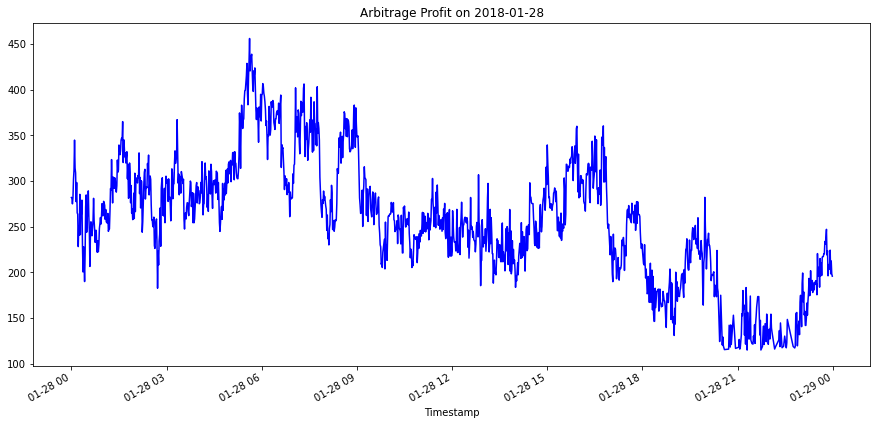

In [113]:
# Plotting the results for the early-date profit per trade dataframe.
profit_per_trade_early.plot(figsize=(15, 7), title="Arbitrage Profit on "+early_date, color="blue")

In [114]:
# Generating the summary statistics for the middle-date profit per trade dataframe.
profit_per_trade_middle.describe()

count    110.000000
mean      96.438246
std       42.725661
min       61.736310
25%       68.954441
50%       81.013015
75%      108.232513
max      289.997975
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Profit on 2018-02-06'}, xlabel='Timestamp'>

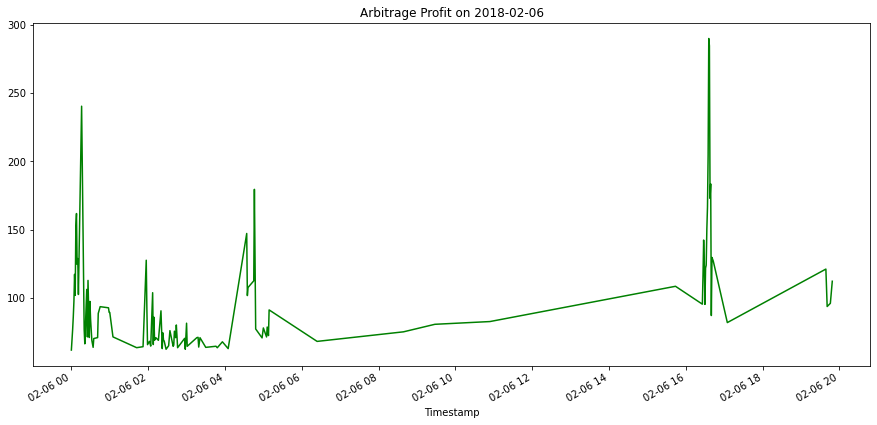

In [115]:
# Plotting the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(15, 7), title="Arbitrage Profit on "+middle_date, color="green")

In [116]:
# Generating the summary statistics for the late-date profit per trade dataframe.
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Profit on 2018-03-30'}, xlabel='Timestamp'>

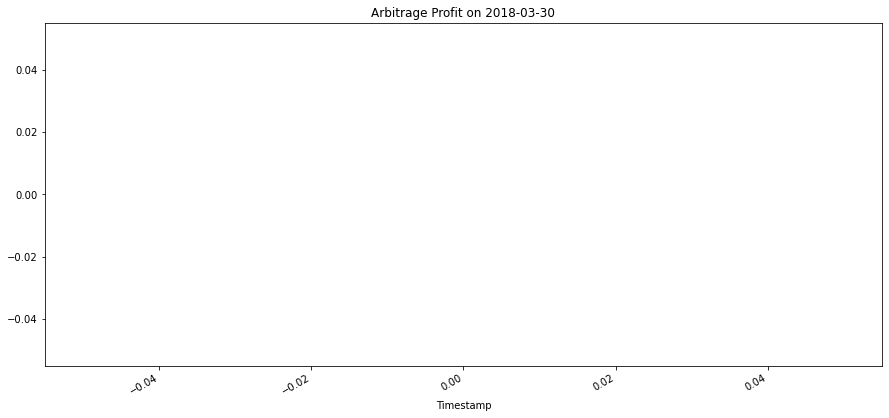

In [117]:
# Plotting the results for the late profit per trade dataframe.
profit_per_trade_late.plot(figsize=(15, 7), title="Arbitrage Profit on "+late_date, color="red")

In [118]:
# Calculating the sum of the potential profits for the early-date profit per trade dataframe.
profit_sum_early = profit_per_trade_early.sum()
print("Total potential profit for the early date: " + str(profit_sum_early))

Total potential profit for the early date: 358149.64796729136


In [119]:
# Calculating the sum of the potential profits for the middle-date profit per trade dataframe.
profit_sum_middle = profit_per_trade_middle.sum()
print("Total potential profit for the middle date: " + str(profit_sum_middle))

Total potential profit for the middle date: 10608.207038027704


In [120]:
# Calculating the sum of the potential profits for the late-date profi per trade dataframe.
profit_sum_late = profit_per_trade_late.sum()
print("Total potential profit for the late date: " + str(profit_sum_late))

Total potential profit for the late date: 0.0


In [121]:
# Using the cumsum function to calculate the cumulative profits over time for the early-date profit per trade dataframe.
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Profit on 2018-01-28'}, xlabel='Timestamp'>

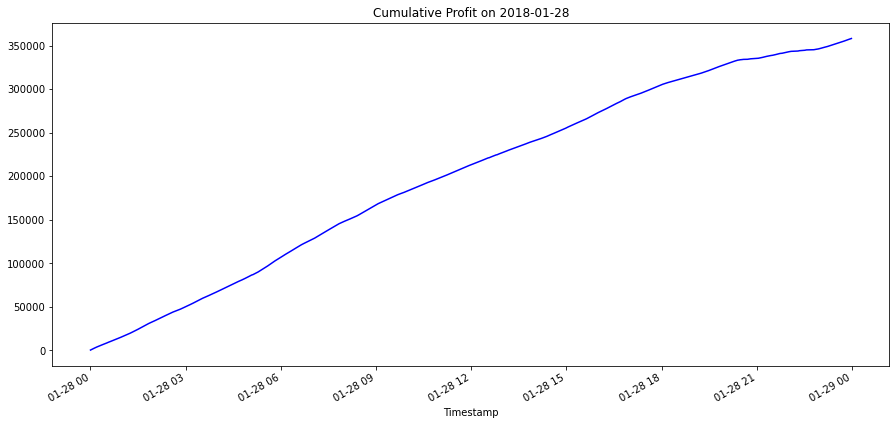

In [122]:
# Plotting the cumulative sum of profits for the early-date profit per trade dataframe.
cumulative_profit_early.plot(figsize=(15, 7), title="Cumulative Profit on "+early_date, color="blue")

In [123]:
# Using the cumsum function to calculate the cumulative profits over time for the middle-date profit per trade dataframe.
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Profit on 2018-02-06'}, xlabel='Timestamp'>

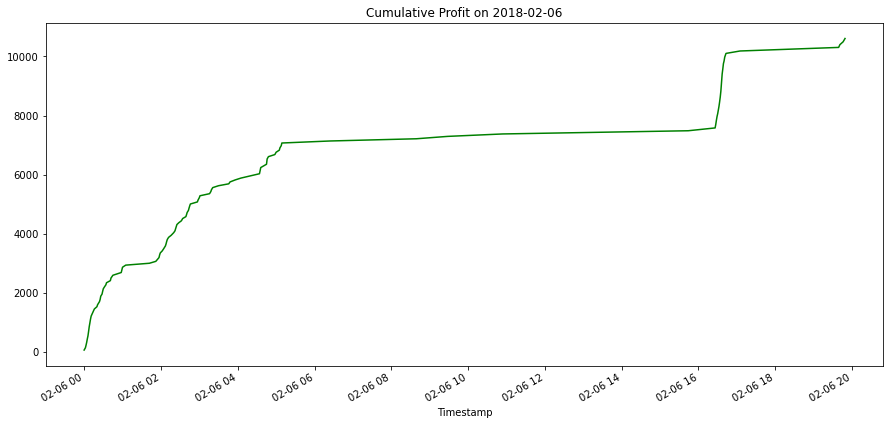

In [124]:
# Plotting the cumulative sum of profits for the middle-date profit per trade dataframe.
cumulative_profit_middle.plot(figsize=(15, 7), title="Cumulative Profit on "+middle_date, color="green")

In [125]:
# Using the cumsum function to calculate the cumulative profits over time for the late-date profit per trade dataframe.
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Profit on 2018-03-30'}, xlabel='Timestamp'>

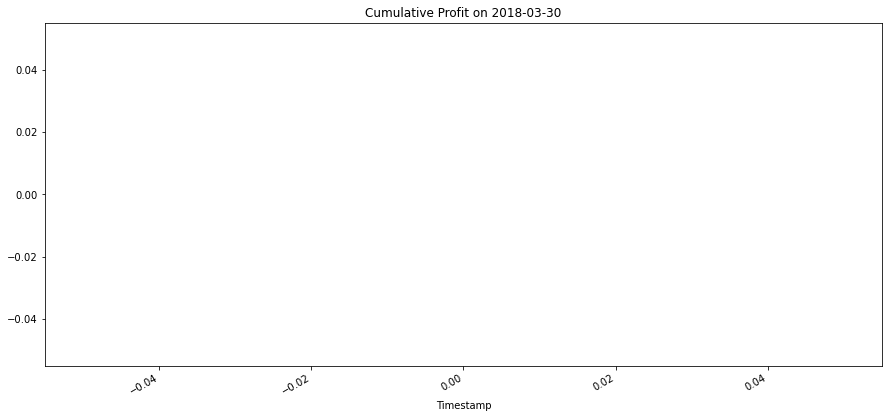

In [126]:
# Plotting the cumulative sum of profits for the late-date profit per trade DataFrame. THERE ARE NONE.
cumulative_profit_late.plot(figsize=(15, 7), title="Cumulative Profit on "+late_date, color="red")

**Notes:** By virtually every measure considered in this analysis the opportunities to profit off market failures in cryptocurrency exchanges through arbitrage deminished across the days chosen as sample dates for the 3-month span of the dataset. The arbitrage spread on the first date considered averages $247. This is higher than the middle-date spread by a factor of 10. By comparison, the mean arbitrage spread in the late-date data is just 7 dollars. On January 28, 2018 there were opportunities for profitable arbitrage trades throughout the entire day. On the middle date, Februrary 6, 2018, markets self-corrected much more quickly and price spreads narrowed as the day wore on, with a few short-lived gaps opening up later in the day. On March 30, 2018 (the late-date sample), price spreads were too narrow throughout the day to make a profitable arbitrage trade. The sum of the pontential profit declined from a high of $358K in January to $10,608 dollars in February and $0.00 in March.